In [1]:
import geemap   # Please update the geemap package for a better experience
import ee
import os
import geopandas as gpd
import pandas as pd
import fiona
from geemap import cartoee as cee
from geemap.datasets import DATA
from matplotlib import pylab
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gstools as gs
import matplotlib.pyplot as plt
import xarray as xr
%pylab inline
%matplotlib inline
# For very first time user Authentication is required
#ee.Initialize()
#reducer = ee.Reducer.mean()


Populating the interactive namespace from numpy and matplotlib


In [2]:
Map = geemap.Map(center = [14, 100], zoom=5.4)
Map

Map(center=[14, 100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

In [3]:
# Exporting the maps
# All files will automatically downloaded in user's Download folder or one can also download by clicking the link at the desired location.

#out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
#geemap.ee_export_image_collection(Map,out_dir=out_dir) #reducing the scale from 1000m to 5000m to avoid the co
download_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
    
jpg_file = os.path.join(download_dir, 'my_map.jpg')
Map.to_image(outfile=jpg_file,monitor=1)

In [4]:
# Importing shapefile and adding to map as a layer
#TH_shp = ee.FeatureCollection(r'D:\test1\Sentinel5p_th\Shapfile\TH_PROVINCE2012\TH_PROVINCE2012.shp')
#Thailand = geemap.shp_to_ee(TH_shp)

#Map.addLayer(Thailand, {}, 'TH_PROVINCE2012')

#-----------------------------------
#th_shp = ee.FeatureCollection(r'C:\Users\Econ02\Documents\Shapfile\TH_PROVINCE2012\TH_PROVINCE2012.shp ')
#Map.addLayer(th_shp, {}, 'TH_PROVINCE2012')

#-------------------------------------
#Thailand = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq('ADM0_NAME', 'Thailand')).first()).geometry()
#Map.addLayer(Thailand, {}, 'TH')
#-------------------------------------
#countries = ee.FeatureCollection('D:\GIS\datum WGS84\TH_merge\TH_merge.shp')
#style = {
    #"color": "00000088",
    #"width": 1,
    #"fillColor": "00000000"}
#Map.addLayer(countries.style(**style), {}, "Countries")

In [5]:
##Importing NO2 data (tropospheric NO2 column number density in mol/m^2) from GEE Image collection
NO2 = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('NO2_column_number_density')

In [6]:
##Long term analysis (comparison of 2019 and 2020)
NO2_2021 = NO2.filterDate('2021-02-01', '2021-5-16').mean()#.multiply(1e6) # converted from mol/m^2 into µmol/m^2
#NO2_2020 = NO2.filterDate('2020-01-01', '2020-12-31').mean().multiply(1e6)

In [7]:
vizParams = {
  'min': 0,
  'max': 0.0002,
  'opacity' : 0.9,
  'palette': [ 'black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

Map.addLayer(NO2_2021, vizParams, 'NO2_2021')

palette = ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
Map.add_colorbar(palette,vmin=0,vmax=0.0002, layer_name='NO2',label='NO2_column_number_density', position='bottomright',width=4)


In [8]:
#Setting Vector th
states = ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM0_NAME', 'Thailand'))
Map.addLayer(states, {}, "US States", False)

vis_params = {
    'color': '000000', 
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 1.3,
    'lineType': 'solid',
    'fillColor': '00000000',
}

Map.addLayer(states.style(**vis_params), {}, "Styled vector")

In [9]:
#Clip thailand
th = NO2_2021.clip(states);

In [10]:
vizParams = {
  'min': 0,
  'max': 0.0002,
  'opacity' : 0.9,
  'palette': [ 'black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

Map.addLayer(th, vizParams, 'NO2_2021')


C:\Users\Econ02\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Econ02\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


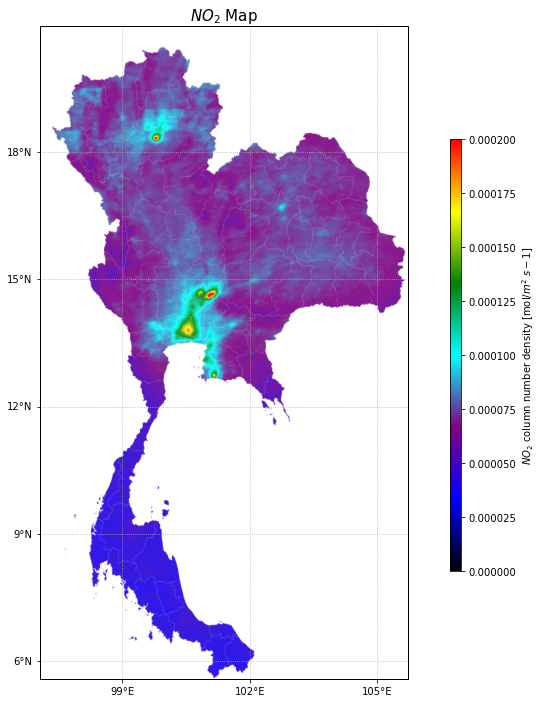

In [12]:
#Create map use cartoee
point = ee.Geometry.Point(100.4985, 13.7338)

#th_map = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2').select('NO2_column_number_density').filterDate('2021-02-01', '2021-5-16').mean()
th_map = th
plt.figure(figsize=(8, 12))

region = [97.05, 5.59, 105.73, 20.96]
vizParams = {
  'min': 0,
  'max': 0.0002,
  'opacity' : 0.9,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

#Customizing colorbar
visualization = {'bands':"$NO_{2}$ column number density [mol/$m^{2}$ $s-1$]", 'min':0.0, 'max':0.0002}
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",\
        ["black", "blue", "purple", "cyan", "green", "yellow", "red"])

ax = cee.get_map(th_map, region=region, vis_params=vizParams)

cee.add_gridlines(ax,interval=(3,3),linestyle=":")
cee.add_colorbar(ax,vis_params=visualization,loc='right',cmap=cmap)

ax.set_title(label = '$NO_{2}$ Map',fontsize = 15)


#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)

plt.show()